In [172]:
#importing different Libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-13 04:43:16,32.31820,-86.90230,53587.0,1121.0,25783.00,26683.0,1092.901859,511506.0,6745.000000,2.091925,10432.117083,12.587008
1,Alaska,US,2020-07-13 04:43:16,61.37070,-152.40440,1479.0,17.0,615.00,847.0,202.174849,145475.0,6428.333333,1.149425,19885.994710,9.968634
2,American Samoa,US,2020-07-13 04:43:16,-14.27100,-170.13200,61973.0,1127.0,7722.00,53124.0,942.355192,816.0,6111.666667,1.488020,1466.544455,7.350261
3,Arizona,US,2020-07-13 04:43:16,33.72980,-111.43120,122467.0,2237.0,14829.00,105401.0,1682.535535,696172.0,5795.000000,1.826615,9564.487807,4.731887
4,Arkansas,US,2020-07-13 04:43:16,34.96970,-92.37310,28367.0,321.0,21591.00,6455.0,939.988150,382402.0,1822.000000,1.131597,12671.532015,6.422956
5,California,US,2020-07-13 04:43:16,36.11620,-119.68160,324543.0,7051.0,13170.00,317492.0,821.373680,5406599.0,3853.500000,2.172593,13683.358185,11.186814
6,Colorado,US,2020-07-13 04:43:16,39.05980,-105.31110,36895.0,1725.0,4749.00,30421.0,640.678788,392103.0,5885.000000,4.675430,6808.837912,15.950671
7,Connecticut,US,2020-07-13 04:43:16,41.59780,-72.75540,47287.0,4348.0,8351.00,34588.0,1326.316787,558209.0,10552.000000,9.194916,15656.776018,22.314801
8,Delaware,US,2020-07-13 04:43:16,39.31850,-75.50710,12804.0,517.0,7120.00,5167.0,1314.897655,137409.0,12561.500000,4.037801,14111.119327,18.458603
9,Diamond Princess,US,2020-07-13 04:43:16,39.10795,-76.26695,49.0,542.5,4428.50,49.0,1425.923172,132146.0,14571.000000,4.637136,16044.803715,14.602405


(58, 15)
total No. of confirmed cases in USA: 3366915.0
total No. of Deaths in USA: 136874.5
total No. of Recovered cases in USA: 1110517.0
total No. of Active cases in USA: 2216535.0


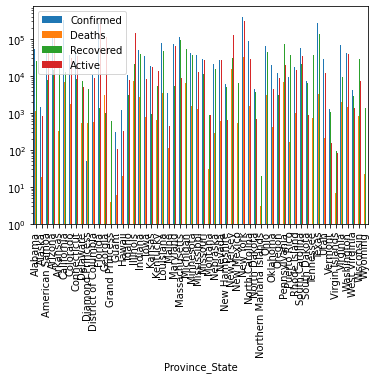

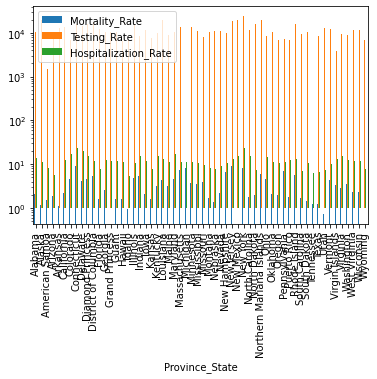

In [174]:
#Reading the file
till_date = pd.read_csv('/content/drive/My Drive/Python/07-12-2020.csv')
#Replacing 0s with NaN values So they can be interpolated. 
cols= ['Confirmed','Deaths','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','UID','ISO3','Testing_Rate','Hospitalization_Rate']
till_date[cols] = till_date[cols].replace(['0', 0], np.nan)
#Interpolating the data
till_date = till_date.interpolate(method='linear', limit_direction='forward', axis=0)
#Dropping some Coumns 
till_date = till_date.drop(['UID', 'ISO3','FIPS'],axis=1)
display(till_date)
print(till_date.shape)
print('total No. of confirmed cases in USA:',till_date['Confirmed'].sum(axis=0))
print('total No. of Deaths in USA:',till_date['Deaths'].sum(axis=0))
print('total No. of Recovered cases in USA:',till_date['Recovered'].sum(axis=0))
print('total No. of Active cases in USA:',till_date['Active'].sum(axis=0))
#Plotting Some inter relations with 'Log'.
till_date.plot(x='Province_State', y=['Confirmed','Deaths','Recovered','Active'], kind= 'bar', log=True)
till_date.plot(x='Province_State', y=['Mortality_Rate','Testing_Rate','Hospitalization_Rate'], kind= 'bar', log=True)

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,34.223334,-82.461707,153,1,0,152.0,623.802340,0.653595
1,30.295065,-92.414197,1339,45,0,1294.0,2158.111048,3.360717
2,37.767072,-75.632346,1042,14,0,1028.0,3224.408962,1.343570
3,43.452658,-116.241552,4146,25,0,4121.0,860.903637,0.602991
4,41.330756,-94.471059,17,0,0,17.0,237.695749,0.000000
...,...,...,...,...,...,...,...,...
3129,40.003468,-102.425867,54,0,0,54.0,538.975946,0.000000
3130,27.001564,-99.169872,76,0,0,76.0,536.003950,0.000000
3131,28.866172,-99.760508,60,0,0,60.0,506.756757,0.000000
3132,44.978819,-101.665462,3,0,0,3.0,108.853411,0.000000


Lat                    2.715585e+01
Long_                  1.565135e+02
Confirmed              3.623225e+07
Deaths                 2.120939e+05
Recovered              0.000000e+00
Active                 3.170168e+07
Incidence_Rate         7.046307e+05
Case-Fatality_Ratio    1.252559e+01
dtype: float64


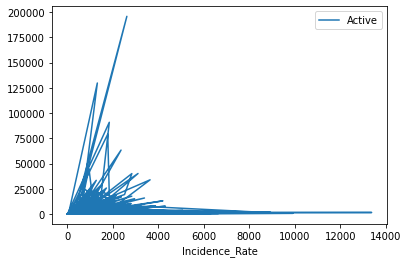

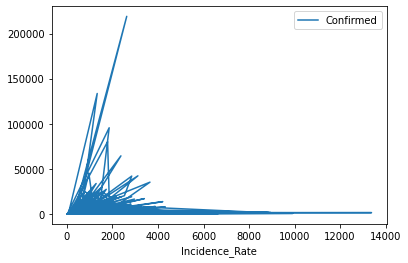

In [175]:
#First we will clean the data 
csse_daily = pd.read_csv('/content/drive/My Drive/Python/csse_daily.csv')
csse_daily[['Confirmed','Deaths','Recovered','Active','Case-Fatality_Ratio']].interpolate(method='linear', limit_direction='forward', axis=0)
csse_daily = csse_daily.dropna(axis=0)
csse_daily = csse_daily.drop(['FIPS','Admin2','Province_State','Country_Region','Last_Update','Combined_Key'],axis=1)
display(csse_daily)
print(csse_daily.var(axis=0))
csse_daily.plot(x='Incidence_Rate', y=['Active'], kind = 'line')
csse_daily.plot(x='Incidence_Rate', y=['Confirmed'], kind = 'line')

In [176]:

csse_daily.head()
scaler = StandardScaler()
print(scaler.fit(csse_daily))
print(csse_daily.var(axis=0))

StandardScaler(copy=True, with_mean=True, with_std=True)
Lat                    2.715585e+01
Long_                  1.565135e+02
Confirmed              3.623225e+07
Deaths                 2.120939e+05
Recovered              0.000000e+00
Active                 3.170168e+07
Incidence_Rate         7.046307e+05
Case-Fatality_Ratio    1.252559e+01
dtype: float64


In [177]:
#WE will apply some ML models and make Incidence_Rate as the labeled data.
#Here We will apply train_test_split in the model.
#we applied normalization 
#we applied CV score.
#WE will make Incidence_Rate as our Labelled data.
y=csse_daily.Incidence_Rate
X=csse_daily.drop(['Incidence_Rate'], axis=1)
N_X= preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(N_X,y,test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.predict(X_test)
lm.score(X_test,y_test)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=8)
scores  

array([0.33288978, 0.34931995, 0.35250323, 0.22777808, 0.33757861,
       0.24207852, 0.2231501 , 0.32158202])

In [178]:
#Here we Will deal with the global Confirmed Cases
confirmed_global = pd.read_csv('/content/drive/My Drive/Python/time_series_covid19_confirmed_global.csv')
confirmed_global = confirmed_global.drop(['Province/State','Lat','Long'], axis=1)
confirmed_global.loc['Total_confirmed']= confirmed_global.sum(numeric_only=True, axis=0)
display(confirmed_global)


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,18054.0,18969.0,19551.0,20342.0,20917.0,21459.0,22142.0,22890.0,23546.0,24102.0,24766.0,25527.0,26310.0,26874.0,27532.0,27878.0,28424.0,28833.0,29157.0,29481.0,29640.0,30175.0,30451.0,30616.0,30967.0,31238.0,31517.0,31836.0,32022.0,32324.0,32672.0,32951.0,33190.0,33384.0,33594.0,33908.0,34194.0,34366.0,34451.0,34455.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1197.0,1212.0,1232.0,1246.0,1263.0,1299.0,1341.0,1385.0,1416.0,1464.0,1521.0,1590.0,1672.0,1722.0,1788.0,1838.0,1891.0,1962.0,1995.0,2047.0,2114.0,2192.0,2269.0,2330.0,2402.0,2466.0,2535.0,2580.0,2662.0,2752.0,2819.0,2893.0,2964.0,3038.0,3106.0,3188.0,3278.0,3371.0,3454.0,3571.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,9831.0,9935.0,10050.0,10154.0,10265.0,10382.0,10484.0,10589.0,10698.0,10810.0,10919.0,11031.0,11147.0,11268.0,11385.0,11504.0,11631.0,11771.0,11920.0,12076.0,12248.0,12445.0,12685.0,12968.0,13273.0,13571.0,13907.0,14272.0,14657.0,15070.0,15500.0,15941.0,16404.0,16879.0,17348.0,17808.0,18242.0,18712.0,19195.0,19689.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,852.0,852.0,852.0,852.0,852.0,852.0,852.0,852.0,853.0,853.0,853.0,853.0,854.0,854.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,858.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,86.0,86.0,88.0,91.0,92.0,96.0,113.0,118.0,130.0,138.0,140.0,142.0,148.0,155.0,166.0,172.0,176.0,183.0,186.0,189.0,197.0,212.0,212.0,259.0,267.0,276.0,284.0,291.0,315.0,328.0,346.0,346.0,346.0,386.0,386.0,396.0,458.0,462.0,506.0,525.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,453.0,469.0,482.0,484.0,496.0,524.0,560.0,591.0,632.0,705.0,728.0,844.0,885.0,902.0,909.0,919.0,922.0,941.0,967.0,992.0,1015.0,1076.0,1089.0,1103.0,1118.0,1128.0,1158.0,1190.0,1221.0,1240.0,1248.0,1265.0,1284.0,1297.0,1318.0,1356.0,1380.0,1389.0,1465.0,1498.0
263,Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.0,132.0,141.0,141.0,141.0,141.0,162.0,162.0,163.0,176.0,176.0,176.0,197.0,197.0,210.0,210.0,247.0,247.0,247.0,265.0,265.0,272.0,272.0,272.0,272.0,272.0,303.0,303.0,303.0,309.0,309.0,311.0,311.0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,Total_confirmed,Date
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,555,1/22/20
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,654,1/23/20
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,941,1/24/20
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1434,1/25/20
1/26/20,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2118,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,33908,3188,17808,855,396,73,90693,30346,113,3467,31,1068,443,228,3397,627,18615,22464,107,31528,175494,98,64411,62210,1285,80,44113,6086,1.75578e+06,141,6672,1005,1552,141,14916,8519,3028,13,325,166,...,369,1895,885,0,18,23,1092,372,24,30,19,1342,5220,1790,2370,16,5,11,4100,321,3,8,55,9,314,191,1598,7,1942,13,1,2021,10,726,1356,314,6410,134,1.22685e+07,7/9/20
7/10/20,34194,3278,18242,855,458,74,94060,30903,113,3474,31,1070,443,228,3560,634,18709,22990,108,32039,178443,98,64604,62357,1285,80,45565,6402,1.80083e+06,141,6964,1020,1591,141,14916,8596,3053,13,325,166,...,370,1895,942,0,18,23,1111,394,24,37,19,1342,5551,1842,2404,17,5,11,4307,326,3,8,66,9,314,191,1613,7,2069,13,2,2021,10,727,1380,314,6457,184,1.24985e+07,7/10/20
7/11/20,34366,3371,18712,855,462,74,97509,31392,113,3478,31,1070,443,228,3799,635,18783,23521,111,32470,181129,103,64767,62469,1378,82,47200,6719,1.83985e+06,141,7175,1033,1623,156,15173,8596,3053,13,325,166,...,370,1895,982,0,18,23,1135,394,24,37,19,1389,5931,1842,2406,17,5,11,4715,330,3,8,71,9,314,191,1618,7,2261,13,2,2021,10,727,1389,317,6506,184,1.27179e+07,7/11/20
7/12/20,34451,3454,19195,855,506,74,100166,31969,113,3492,31,1071,443,228,3967,635,18897,24041,111,32941,183795,103,64932,62707,1378,84,48187,6877,1.86468e+06,141,7252,1036,1623,156,15173,8596,3053,13,325,166,...,372,1895,985,0,18,23,1157,394,24,37,19,1433,6230,1842,2411,17,5,11,4931,331,3,8,71,9,399,191,1635,7,2364,13,2,2021,10,729,1465,317,6552,233,1.29104e+07,7/12/20


Text(0, 0.5, 'confirmed global cases with log')

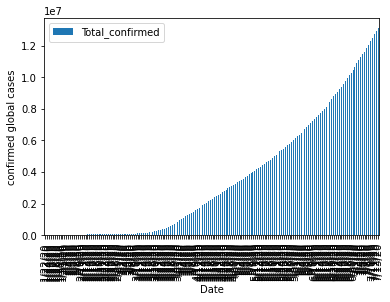

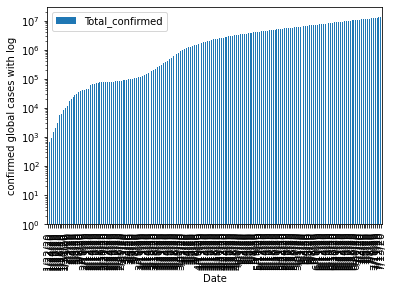

In [179]:
#To apply Ml we will transpose the DataFrame 
confirmed_trans_global = confirmed_global.transpose()
#Remove the country names as they are not need to apply ML
confirmed_trans_global=confirmed_trans_global.drop(['Country/Region'], axis=0)
confirmed_trans_global['Date'] = confirmed_trans_global.index
display(confirmed_trans_global)

#WE will display the relation bw Date and Total_confirmed cases
confirmed_trans_global.plot(x='Date', y='Total_confirmed', kind='bar' )
plt.xlabel('Date', fontsize=10)
plt.ylabel('confirmed global cases', fontsize=10)
#WE will display the relation bw Date and Total_confirmed cases with log
confirmed_trans_global.plot(x='Date', y='Total_confirmed', kind='bar', log=True)
plt.xlabel('Date', fontsize=10)
plt.ylabel('confirmed global cases with log', fontsize=10)

In [180]:
confirmed_trans_global.index
confirmed_trans_global.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 1/22/20 to 7/13/20
Columns: 268 entries, 0 to Date
dtypes: object(268)
memory usage: 365.7+ KB


In [181]:
y=confirmed_trans_global.Total_confirmed
X=confirmed_trans_global.drop(['Total_confirmed','Date'], axis=1)
N_X= preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(N_X,y,test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.intercept_
lm.coef_
predictions = lm.predict(X_test)
lm.score(X_test,y_test)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=8)
scores  
print(predictions)




[ 9.60598905e+06  7.88137067e+06  3.42783232e+06  5.80179571e+06
  7.35434836e+06  7.10787291e+06  9.79844847e+04 -3.00401912e+03
  5.69980450e+06  5.74226632e+05  4.36400872e+06  1.82091888e+05
  1.78203313e+05  5.81755024e+04  8.58271750e+04 -1.33466080e+04
  4.46689378e+06  2.65877195e+05  7.28800291e+04  9.40887707e+06
  6.99194737e+06  1.16274583e+07  5.93986497e+06  7.62144368e+04
  3.93375529e+05  9.19362549e+04  4.10744830e+06  7.39235968e+04
  2.02308148e+04  1.61678005e+06  7.32343997e+04  6.38547564e+04
  4.48528149e+04  6.55591481e+05  4.77802443e+06  4.88930848e+06
  7.61905233e+06  1.10469617e+07  1.00009909e+05  7.22562381e+06
  3.66209534e+06  7.79805324e+05  8.37954321e+06  3.87879915e+05
  3.18666753e+06  1.04364701e+07  8.48879583e+06  1.35120140e+06
  4.01854354e+06  7.31443839e+04  8.81381879e+06  2.55164336e+06
  4.60866093e+06]


In [182]:
#Here we Will deal with Global Death Cases
deaths_global = pd.read_csv('/content/drive/My Drive/Python/time_series_covid19_deaths_global.csv')
deaths_global = deaths_global.drop(['Province/State','Lat','Long'], axis=1)
deaths_global.loc['Total_death']= deaths_global.sum(numeric_only=True, axis=0)
display(deaths_global)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,300.0,309.0,327.0,357.0,369.0,384.0,405.0,426.0,446.0,451.0,471.0,478.0,491.0,504.0,546.0,548.0,569.0,581.0,598.0,618.0,639.0,675.0,683.0,703.0,721.0,733.0,746.0,774.0,807.0,819.0,826.0,864.0,898.0,920.0,936.0,957.0,971.0,994.0,1010.0,1012.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33.0,33.0,34.0,34.0,34.0,34.0,34.0,35.0,36.0,36.0,36.0,36.0,37.0,38.0,39.0,42.0,43.0,44.0,44.0,45.0,47.0,49.0,51.0,53.0,55.0,58.0,62.0,65.0,69.0,72.0,74.0,76.0,79.0,81.0,83.0,83.0,85.0,89.0,93.0,95.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,681.0,690.0,698.0,707.0,715.0,724.0,732.0,741.0,751.0,760.0,767.0,777.0,788.0,799.0,811.0,825.0,837.0,845.0,852.0,861.0,869.0,878.0,885.0,892.0,897.0,905.0,912.0,920.0,928.0,937.0,946.0,952.0,959.0,968.0,978.0,988.0,996.0,1004.0,1011.0,1018.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,51.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,5.0,5.0,6.0,6.0,6.0,6.0,7.0,8.0,8.0,9.0,9.0,10.0,10.0,10.0,10.0,10.0,10.0,11.0,11.0,13.0,15.0,17.0,18.0,19.0,19.0,19.0,21.0,21.0,22.0,23.0,23.0,26.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,103.0,111.0,111.0,112.0,112.0,127.0,129.0,136.0,139.0,160.0,164.0,208.0,214.0,244.0,248.0,251.0,254.0,256.0,257.0,261.0,274.0,288.0,293.0,296.0,302.0,304.0,312.0,318.0,325.0,335.0,337.0,338.0,345.0,348.0,351.0,361.0,364.0,365.0,417.0,424.0
263,Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,5.0,5.0,5.0,5.0,5.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
264,Tajikistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,48.0,48.0,48.0,48.0,48.0,48.0,49.0,49.0,50.0,50.0,50.0,50.0,51.0,51.0,51.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,52.0,53.0,53.0,53.0,54.0,54.0,55.0,55.0,55.0,55.0
265,Les

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,Total_death,Date
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,1/22/20
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,1/23/20
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,1/24/20
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1/25/20
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,957,83,988,52,22,3,1720,535,3,49,0,6,4,13,22,9,706,284,11,103,2238,7,449,9778,23,0,1638,214,69184,3,262,53,18,0,359,161,186,0,7,2,...,0,42,9,1,0,0,9,14,0,2,0,38,24,25,120,0,0,0,86,6,0,1,2,2,1,1,63,0,25,0,0,38,1,14,361,7,54,1,554924,7/9/20
7/10/20,971,85,996,52,23,3,1774,546,3,49,0,6,4,13,23,9,706,292,11,104,2275,7,454,9781,23,0,1702,216,70398,3,267,53,19,0,359,161,187,0,7,2,...,0,42,13,1,0,0,9,16,0,2,0,38,27,26,121,0,0,0,94,6,0,1,2,2,1,1,63,0,31,0,0,38,1,14,364,7,55,1,560209,7/10/20
7/11/20,994,89,1004,52,23,3,1810,559,3,49,0,6,4,13,24,9,706,298,11,104,2305,7,459,9782,26,0,1754,219,71469,3,267,53,19,0,359,160,187,0,7,2,...,0,42,18,1,0,0,9,16,0,2,0,38,33,26,121,0,0,0,101,6,0,1,2,2,1,1,63,0,33,0,0,38,1,14,365,7,55,1,565138,7/11/20
7/12/20,1010,93,1011,52,26,3,1845,565,3,49,0,6,4,13,24,9,708,306,11,108,2352,7,464,9782,26,0,1807,221,72100,3,268,53,19,0,359,160,187,0,7,2,...,0,42,18,1,0,0,9,16,0,2,0,39,36,26,121,0,0,0,102,6,0,1,2,2,1,1,63,0,38,0,0,38,1,14,417,7,55,2,569128,7/12/20


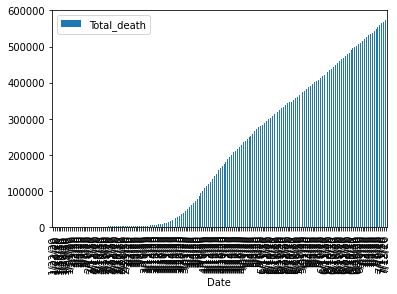

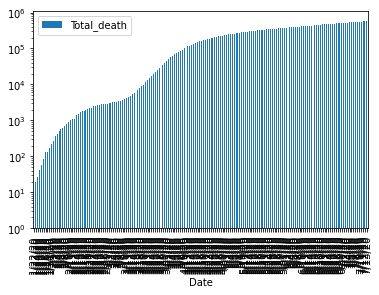

In [183]:
#To apply Ml we will transpose the DataFrame 
deaths_trans_global = deaths_global.transpose()
#Remove the country names as they are not need to apply ML
deaths_trans_global= deaths_trans_global.drop(['Country/Region'], axis=0)
deaths_trans_global['Date'] = deaths_trans_global.index
display(deaths_trans_global)

#WE will display the relation bw Date and deaths cases
deaths_trans_global.plot(x='Date', y='Total_death', kind='bar')
#WE will display the relation bw Date and Total_deaths cases with log
deaths_trans_global.plot(x='Date', y='Total_death', kind='bar', log=True)


In [184]:
y=deaths_trans_global.Total_death
X=deaths_trans_global.drop(['Total_death','Date'], axis=1)
N_X= preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(N_X,y,test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.intercept_
lm.coef_
predictions = lm.predict(X_test)
lm.score(X_test,y_test)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=8)
scores  
print(predictions)

[ 4.90409899e+05  4.34729264e+05  2.43641019e+05  3.64084169e+05
  4.17680957e+05  4.06532619e+05  3.06399346e+03  5.01059549e+02
  3.56706068e+05  3.87120827e+04  2.94725798e+05  1.32821584e+04
  3.29416715e+03  1.70831083e+04  3.73984827e+03  1.26159949e+02
  3.01670136e+05 -1.62583504e+03  1.90108407e+03  4.84544235e+05
  4.03937626e+05  5.40480726e+05  3.68809965e+05  5.24627058e+03
  1.36952656e+03  8.30340464e+03  2.85039082e+05 -1.43026020e+02
  2.17038611e+02  1.03651870e+05  4.88648313e+03  3.06648431e+03
  3.14355506e+02  5.21028416e+04  3.20419389e+05  3.25073146e+05
  4.27839706e+05  5.26862084e+05  2.91480227e+03  4.12735382e+05
  2.60297206e+05  4.60380109e+04  4.48750258e+05 -2.55632192e+02
  2.28998685e+05  5.10863692e+05  4.55830461e+05  8.09108278e+04
  2.82498853e+05 -5.77224637e+02  4.65857308e+05  1.85913958e+05
  3.11663805e+05]


In [185]:
recovered_global = pd.read_csv('/content/drive/My Drive/Python/time_series_covid19_recovered_global.csv')
recovered_global = recovered_global.drop(['Province/State','Lat','Long'], axis=1)
recovered_global.loc['Total_recovered']= recovered_global.sum(numeric_only=True, axis=0)
display(recovered_global)

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585.0,1762.0,1830.0,1875.0,2171.0,2651.0,3013.0,3326.0,3928.0,4201.0,4725.0,5164.0,5508.0,6158.0,7660.0,7962.0,8292.0,8764.0,8841.0,9260.0,9869.0,10174.0,10306.0,10674.0,12604.0,13934.0,14131.0,15651.0,16041.0,17331.0,19164.0,19366.0,20103.0,20179.0,20700.0,20847.0,20882.0,21135.0,21216.0,21254.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,898.0,910.0,925.0,938.0,945.0,960.0,980.0,1001.0,1034.0,1039.0,1044.0,1055.0,1064.0,1077.0,1086.0,1114.0,1126.0,1134.0,1159.0,1195.0,1217.0,1250.0,1298.0,1346.0,1384.0,1438.0,1459.0,1516.0,1559.0,1592.0,1637.0,1657.0,1702.0,1744.0,1791.0,1832.0,1875.0,1881.0,1946.0,2014.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6297.0,6453.0,6631.0,6717.0,6799.0,6951.0,7074.0,7255.0,7322.0,7420.0,7606.0,7735.0,7842.0,7943.0,8078.0,8196.0,8324.0,8422.0,8559.0,8674.0,8792.0,8920.0,9066.0,9202.0,9371.0,9674.0,9897.0,10040.0,10342.0,10832.0,11181.0,11492.0,11884.0,12094.0,12329.0,12637.0,13124.0,13124.0,13743.0,14019.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,738.0,741.0,741.0,744.0,751.0,757.0,759.0,780.0,781.0,781.0,781.0,789.0,789.0,791.0,792.0,792.0,792.0,792.0,796.0,797.0,797.0,797.0,799.0,799.0,799.0,799.0,799.0,799.0,800.0,800.0,800.0,800.0,800.0,800.0,802.0,802.0,803.0,803.0,803.0,803.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,24.0,24.0,38.0,38.0,40.0,41.0,42.0,61.0,61.0,64.0,64.0,64.0,64.0,66.0,66.0,77.0,77.0,77.0,77.0,81.0,81.0,81.0,81.0,93.0,93.0,97.0,97.0,107.0,108.0,108.0,108.0,117.0,117.0,117.0,117.0,118.0,118.0,118.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Yemen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17.0,23.0,23.0,23.0,23.0,23.0,23.0,23.0,28.0,39.0,53.0,79.0,91.0,271.0,273.0,288.0,328.0,347.0,350.0,356.0,379.0,386.0,402.0,417.0,430.0,432.0,488.0,504.0,513.0,536.0,537.0,552.0,575.0,591.0,595.0,619.0,630.0,642.0,659.0,675.0
250,Comoros,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.0,55.0,67.0,67.0,67.0,67.0,97.0,97.0,97.0,114.0,114.0,114.0,127.0,127.0,129.0,129.0,159.0,159.0,159.0,159.0,159.0,161.0,161.0,161.0,161.0,161.0,200.0,200.0,200.0,241.0,241.0,266.0,266.0,266.0,272.0,272.0,272.0,296.0,296.0,296.0
251,Tajikistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,Total_recovered,Date
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,28,1/22/20
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30,1/23/20
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,1/24/20
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,39,1/25/20
1/26/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,52,1/26/20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7/9/20,20847,1832,12637,802,117,57,38313,18000,105,2987,29,1057,439,215,2142,602,16758,13591,89,26520,84544,90,53609,17159,19,333,55,13354,2815,1.17145e+06,138,3229,862,730,131,11525,72095,1142,788,274922,...,24606,43570,137,197,512,176,312,10,0,878,969111,7287,2544,347,1348,206,525,19,2063,254,3,7,11,0,31,118,1123,7,369,13,1,333,8,283,619,272,5067,20,6.74012e+06,7/9/20
7/10/20,20882,1875,13124,803,117,57,38984,18709,105,2997,29,1058,439,215,2286,604,16808,14093,89,27213,86406,90,54254,17179,20,333,55,13918,3037,1.21736e+06,138,3308,862,730,131,11525,72466,1142,789,278053,...,25634,43969,137,197,512,176,312,10,0,886,983185,7530,2671,350,1348,320,536,19,2095,256,3,7,11,0,31,118,1133,7,379,13,1,333,8,284,630,272,5115,26,6.87952e+06,7/10/20
7/11/20,21135,1881,13124,803,118,57,41408,19419,105,2988,29,1058,439,215,2289,604,16864,14607,89,27828,88034,90,54919,17196,20,557,57,14333,3078,1.24409e+06,138,3311,869,748,133,11928,72784,1145,790,281114,...,26513,44648,137,197,512,176,312,10,0,896,995576,7723,2671,350,1348,320,536,19,2227,260,3,7,11,0,31,118,1141,7,517,13,1,333,8,284,642,296,5176,26,7.0053e+06,7/11/20
7/12/20,21216,1946,13743,803,118,57,42694,19633,105,2988,29,1058,439,215,2329,606,16952,15093,89,28425,93614,90,55380,17196,20,557,76,14843,3115,1.26484e+06,138,3319,869,748,133,11928,72954,1145,790,283902,...,26971,45140,137,197,512,176,312,10,0,896,1.00633e+06,7852,2671,350,1412,328,942,19,2267,261,3,7,11,0,38,118,1154,7,557,13,1,333,8,286,659,296,5228,32,7.11696e+06,7/12/20


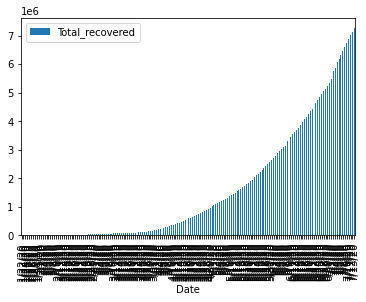

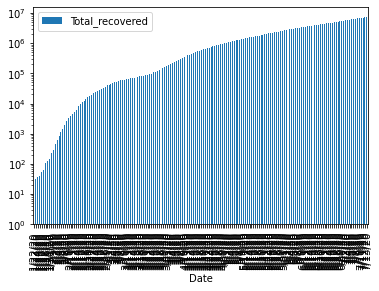

In [186]:
#To apply Ml we will transpose the DataFrame 
recovered_trans_global = recovered_global.transpose()
#Remove the country names as they are not need to apply ML
recovered_trans_global=recovered_trans_global.drop(['Country/Region'], axis=0)
recovered_trans_global['Date'] = recovered_trans_global.index
display(recovered_trans_global)

#WE will display the relation bw Date and Total_recovered cases
recovered_trans_global.plot(x='Date', y='Total_recovered', kind='bar')
#WE will display the relation bw Date and Total_confirmed cases with log
recovered_trans_global.plot(x='Date', y='Total_recovered', kind='bar', log=True)


In [187]:
y=recovered_trans_global.Total_recovered
X=recovered_trans_global.drop(['Total_recovered','Date'], axis=1)
N_X= preprocessing.normalize(X)
X_train,X_test,y_train,y_test=train_test_split(N_X,y,test_size=0.3, random_state=42)
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.intercept_
lm.coef_
predictions = lm.predict(X_test)
lm.score(X_test,y_test)
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=8)
scores  
print(predictions)

[ 4.83859113e+06  3.77526059e+06  1.10108784e+06  2.39727436e+06
  3.42671387e+06  3.37276968e+06  3.93130721e+04  9.05024869e+03
  2.31647384e+06  5.86402508e+04  1.57013478e+06  9.82283450e+04
  5.44007320e+04  8.24319407e+04 -9.84372016e+02 -5.89100982e+05
  1.54706691e+06  8.28179107e+04 -3.57065014e+04  4.71945027e+06
  3.09260263e+06  6.31675316e+06  2.58782161e+06  5.84828345e+04
  8.51860852e+04  4.25663348e+04  1.35213625e+06  2.91754818e+04
 -5.78932199e+04  4.20882460e+05  2.80338374e+04 -5.42316343e+04
  2.81990469e+05  6.97119716e+04  1.73644578e+06  1.79316674e+06
  3.59811659e+06  5.91508551e+06  3.41994762e+04  3.47530887e+06
  1.18690442e+06  9.49579720e+04  4.07137916e+06 -2.34890598e+05
  8.95652083e+05  5.30766037e+06  4.17317340e+06  3.06286918e+05
  1.38047077e+06  2.11136667e+03  4.40602747e+06  6.41937123e+05
  1.74294457e+06]


In [188]:
confirmed_global['confirmed_Sum1'] = confirmed_global.sum(axis=1)
deaths_global['deaths_Sum2'] = deaths_global.sum(axis =1)
recovered_global['recovered_Sum3'] = recovered_global.sum(axis=1)

In [189]:
f=deaths_global['deaths_Sum2']
confirmed_global= pd.concat([confirmed_global,f],axis=1)


In [190]:
c=recovered_global['recovered_Sum3']
confirmed_global= pd.concat([confirmed_global,c], axis=1)
confirmed_global

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,...,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,confirmed_Sum1,deaths_Sum2,recovered_Sum3
0,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,20342.0,20917.0,21459.0,22142.0,22890.0,23546.0,24102.0,24766.0,25527.0,26310.0,26874.0,27532.0,27878.0,28424.0,28833.0,29157.0,29481.0,29640.0,30175.0,30451.0,30616.0,30967.0,31238.0,31517.0,31836.0,32022.0,32324.0,32672.0,32951.0,33190.0,33384.0,33594.0,33908.0,34194.0,34366.0,34451.0,34455.0,1438348.0,32578.0,465719.0
1,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1246.0,1263.0,1299.0,1341.0,1385.0,1416.0,1464.0,1521.0,1590.0,1672.0,1722.0,1788.0,1838.0,1891.0,1962.0,1995.0,2047.0,2114.0,2192.0,2269.0,2330.0,2402.0,2466.0,2535.0,2580.0,2662.0,2752.0,2819.0,2893.0,2964.0,3038.0,3106.0,3188.0,3278.0,3371.0,3454.0,3571.0,137293.0,4059.0,85391.0
2,Algeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,10154.0,10265.0,10382.0,10484.0,10589.0,10698.0,10810.0,10919.0,11031.0,11147.0,11268.0,11385.0,11504.0,11631.0,11771.0,11920.0,12076.0,12248.0,12445.0,12685.0,12968.0,13273.0,13571.0,13907.0,14272.0,14657.0,15070.0,15500.0,15941.0,16404.0,16879.0,17348.0,17808.0,18242.0,18712.0,19195.0,19689.0,843255.0,62627.0,524710.0
3,Andorra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,852.0,852.0,852.0,852.0,852.0,853.0,853.0,853.0,853.0,854.0,854.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,855.0,858.0,82020.0,4695.0,57832.0
4,Angola,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,91.0,92.0,96.0,113.0,118.0,130.0,138.0,140.0,142.0,148.0,155.0,166.0,172.0,176.0,183.0,186.0,189.0,197.0,212.0,212.0,259.0,267.0,276.0,284.0,291.0,315.0,328.0,346.0,346.0,346.0,386.0,386.0,396.0,458.0,462.0,506.0,525.0,12039.0,630.0,3711.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Tajikistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4529.0,4609.0,4690.0,4763.0,4834.0,4902.0,4971.0,5035.0,5097.0,5160.0,5221.0,5279.0,5338.0,5399.0,5457.0,5513.0,5567.0,5630.0,5691.0,5747.0,5799.0,5849.0,5900.0,5900.0,6005.0,6058.0,6058.0,6159.0,6213.0,6262.0,6315.0,6364.0,6410.0,6457.0,6506.0,6552.0,6596.0,285805.0,3111.0,NaN
265,Lesotho,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,12.0,17.0,17.0,17.0,24.0,24.0,27.0,27.0,27.0,35.0,35.0,35.0,35.0,79.0,9

Text(0, 0.5, 'no. of cases')

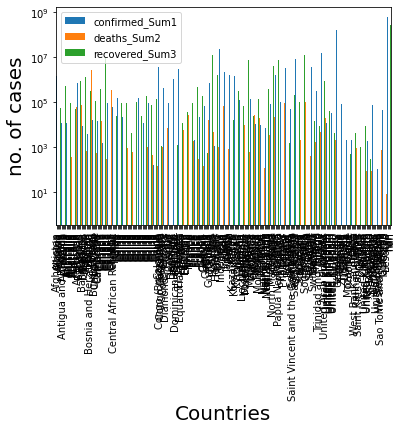

In [196]:
confirmed_global.plot(x='Country/Region', y=['confirmed_Sum1', 'deaths_Sum2','recovered_Sum3'],kind ='bar', log=True)
plt.xlabel('Countries', fontsize=20)
plt.ylabel('no. of cases', fontsize=20)